# Part III: Training a model

Date: 23/08/2022

Authors: Jordi Bolibar & Facundo Sapienza

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Setup

At this point, `df_all` has all the data we will need to train, validate and test the model. However, before moving forward to training a machine learning model with this data, we need to separate an part of the dataset for testing the model and be sure we are not overfitting the model. 

For testing, we can use different strategies:
1. Separate all the measurements for some given set of glaciers and use all the rest for training/validation
1. Separate all the measurements for some given set of glaciers at period (2010-2020) and use all the rest for trainign/validation
1. Separate all the measurements for some given set of glaciers at the period 2010-2020 and use all the measurements for rest of the glaciers and the other period 2000-2010 for training/validation.

For simplicity, in this notebook we are going to implement the first one, but this may not be necessaraly the best option (why?). 

(6834, 37)

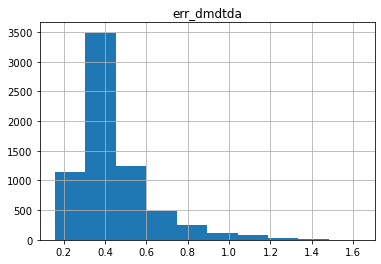

In [3]:
df_all = pd.read_csv('Data/df_all.csv', index_col=['rgi_id', 'period'])
df_all
df_all.hist('err_dmdtda')
df_all.shape

(5866, 37)

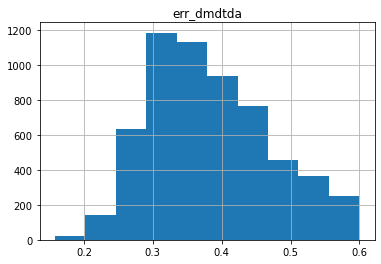

In [4]:
df_all = df_all[df_all.err_dmdtda <0.6]
#df_all = df_all[df_all.area >0.5]
df_all.hist('err_dmdtda')
df_all.shape

In [7]:
# We select a subset of glaciers and use them for test and the rest for training
glaciers_ids_all = np.unique(df_all.index.get_level_values(0).values)

glacier_train, glacier_test = train_test_split(glaciers_ids_all, 
                                               train_size=0.3,
                                               test_size=0.7)

df_train_all = df_all.loc[glacier_train]
df_test = df_all.loc[glacier_test]
df_train_all.shape, df_test.shape

((1746, 37), (4120, 37))

Now we save the test dataset into a file in order to put it aside.

In [8]:
df_test.to_csv('Data/df_test.csv')

In [9]:
df_train_all.to_csv('Data/df_train_all.csv')

Now we are going to train the models based on the train dataset, which will have to be split again into train and validation.

In [10]:
glaciers_ids = np.unique(df_train_all.index.get_level_values(0).values)

train_dataset, validation_dataset = train_test_split(glaciers_ids, 
                                               train_size=0.8,
                                               test_size=0.2)

df_train = df_all.loc[train_dataset]
df_validation = df_all.loc[validation_dataset]
df_train.shape, df_validation.shape

((1395, 37), (351, 37))

In [12]:
features_to_drop = ['area', 'zmin','zmax', 'dmdtda', 'err_dmdtda', 'target_id']

df_train_X = df_train.drop(features_to_drop, axis=1)
df_train_y = df_train[['dmdtda']]

X_train, y_train = df_train_X.values, df_train_y.values

# And the same for test set
df_validation_X = df_validation.drop(features_to_drop, axis=1)
df_validation_y = df_validation[['dmdtda']]

X_validation, y_validation = df_validation_X.values, df_validation_y.values

In [99]:
df_train_X

PDD  icecap     lat     prcp_01     prcp_02  \
rgi_id         period                                                         
RGI60-08.00290 2000-2010  44.608462     0.0  66.603  204.750484  229.624525   
               2010-2020  44.362270     0.0  66.603  227.197272  184.799143   
RGI60-08.00336 2010-2020  63.063267     0.0  61.753  294.459489  256.134086   
RGI60-08.03078 2000-2010  66.921911     0.0  68.653   99.682094   90.845696   
               2010-2020  67.873570     0.0  68.653  108.802441   81.996710   
...                             ...     ...     ...         ...         ...   
RGI60-08.00820 2010-2020  36.398001     0.0  61.759  117.514951  104.175643   
RGI60-08.01085 2000-2010  71.486317     0.0  61.569  212.872825  220.988379   
               2010-2020  71.188481     0.0  61.569  214.286146  186.958109   
RGI60-08.01522 2000-2010  34.684690     0.0  66.538  159.905287  177.234632   
               2010-2020  34.490067     0.0  66.538  174.913671  143.377756   

                             prcp_03     prcp_04     prcp_05     prcp_06  \
rgi_id         period                                                      
RGI60-08.00290 2000-2010  229.918733  225.904425  173.551110  138.296717   
               2010-2020  245.202883  159.981954  156.159075  177.281500   
RGI60-08.00336 2010-2020  327.341211  224.593275  185.156688  211.318438   
RGI60-08.03078 2000-2010   94.302998   90.827148   83.272034   58.092293   
               2010-2020  101.889186   68.952852   72.316424   82.406410   
...                              ...         ...         ...         ...   
RGI60-08.00820 2010-2020  130.619146  100.291552   75.960305   86.221975   
RGI60-08.01085 2000-2010  234.506659  235.166991  157.271513  136.296849   
               2010-2020  244.406611  172.977892  135.717055  149.670069   
RGI60-08.01522 2000-2010  180.387858  179.008132  135.010384  108.761333   
               2010-2020  193.216298  128.555372  121.908860  139.617132   

                             prcp_07  ...   temp_04   temp_05   temp_06  \
rgi_id         period                 ...                                 
RGI60-08.00290 2000-2010  107.122303  ... -4.674445 -6.012593 -5.435926   
               2010-2020  138.737461  ... -6.328889 -5.820371 -4.922593   
RGI60-08.00336 2010-2020  131.163927  ... -2.586667 -2.136667 -1.206667   
RGI60-08.03078 2000-2010   57.530881  ... -6.380741 -7.246667 -5.542963   
               2010-2020   66.572433  ... -8.049630 -7.034445 -5.098519   
...                              ...  ...       ...       ...       ...   
RGI60-08.00820 2010-2020   53.343734  ... -9.779999 -8.720000 -6.646666   
RGI60-08.01085 2000-2010   87.081903  ... -3.095926 -3.878518 -2.756296   
               2010-2020   85.942565  ... -4.514815 -3.862963 -2.315185   
RGI60-08.01522 2000-2010   80.459914  ... -6.653704 -7.748889 -6.801111   
               2010-2020  102.950489  ... -8.450371 -7.572222 -6.263333   

                           temp_07   temp_08   temp_09    temp_10    temp_11  \
rgi_id         period                                                          
RGI60-08.00290 2000-2010 -1.300370  2.529259  6.194815   9.515927   8.990001   
               2010-2020 -1.729259  2.673704  5.833704   9.241483   8.810001   
RGI60-08.00336 2010-2020  1.123333  4.846668  7.853332  10.383332  10.260001   
RGI60-08.03078 2000-2010 -0.585556  3.960000  8.320742  12.074444  10.796667   
               2010-2020 -0.587778  4.451111  8.070742  11.951111  10.631111   
...                            ...       ...       ...        ...        ...   
RGI60-08.00820 2010-2020 -2.910000  1.879999  5.716667   8.316666   7.643335   
RGI60-08.01085 2000-2010  1.143333  5.356666  8.719999  11.274444  10.696297   
               2010-2020  0.772222  5.271111  8.572222  10.993333  10.438519   
RGI60-08.01522 2000-2010 -2.407037  1.834445  5.873333   9.281852   8.618889   
               2010-2020 -2.775926  2.005556  5.512222   9.009630   8.392222   

## Training a model 

The `sklearn` package includes multiple regression models we can try on the dataset. One of the advantages of using `sklearn` is that the syntax and logic is shared among different algorithms, making easy to try and compare different models. The [sklearn documentation](https://scikit-learn.org/stable/auto_examples/index.html#examples) includes multiple of these examples that are worth exploring. 

Some regression methods to explore include
1. Clasical continouos regression approaches: linear regression, logistic regression, support vector machines
1. Tree-based regression: decision trees, random forest, ensamble methods based on boosting
1. Neural networks

The following plot function will be useful in order to report the performance of the different models.

In [13]:
def plot_prediction(y1, y2, n_toplot=10**10):
    
    from scipy.stats import gaussian_kde
    from sklearn.metrics import r2_score, mean_squared_error
    
    idxs = np.arange(len(y1))
    np.random.shuffle(idxs)
    
    y_expected = y1.reshape(-1)[idxs[:n_toplot]]
    y_predicted = y2.reshape(-1)[idxs[:n_toplot]]

    xy = np.vstack([y_expected, y_predicted])
    z = gaussian_kde(xy)(xy)
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    y_plt, ann_plt, z = y_expected[idx], y_predicted[idx], z[idx]
    
    plt.figure(figsize=(8,8))
    plt.title("Model Evaluation", fontsize=17)
    plt.ylabel('Modeled SMB (m.w.e)', fontsize=16)
    plt.xlabel('Reference SMB (m.w.e)', fontsize=16)
    sc = plt.scatter(y_plt, ann_plt, c=z, s=20)
    plt.clim(0,0.4)
    plt.tick_params(labelsize=14)
    plt.colorbar(sc) 
    lineStart = -2.5
    lineEnd = 1.5
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-')
    plt.axvline(0.0, ls='-.', c='k')
    plt.axhline(0.0, ls='-.', c='k')
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    plt.gca().set_box_aspect(1)
    
    textstr = '\n'.join((
    r'$RMSE=%.2f$' % (mean_squared_error(y_expected, y_predicted), ),
    r'$R^2=%.2f$' % (r2_score(y_expected, y_predicted), )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    plt.show()

### Linear Regression

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

For linear regression and many other methods, we will scale the data to have zero mean and unit variance.

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [16]:
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

ElasticNet is a linear regression model that includes the classical ordinary least square error estimatior (`alpha=0.0`), Lasso (`l1_ratio=1`) and Ridge (`l1_ratio=0`) regression in one single method. 

In [17]:
%time
reg_linear = ElasticNet(alpha=0.001,
                        l1_ratio=0.2,
                        fit_intercept=True, 
                        random_state=666)
reg_linear.fit(X_train_scaled, y_train)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


/home/jovyan/shared-public/envs/Finse_MassBalance/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.077e+01, tolerance: 1.660e-02
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.001, l1_ratio=0.2, random_state=666)

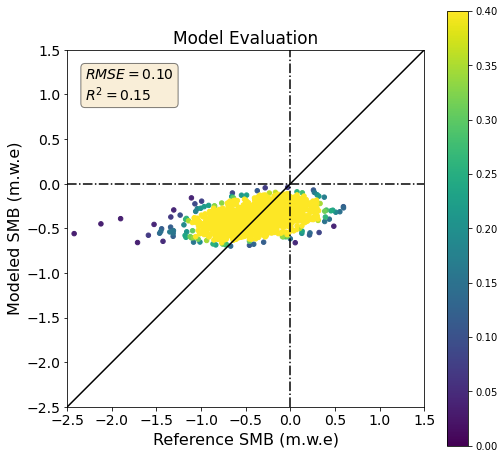

In [18]:
plot_prediction(y_train, reg_linear.predict(X_train_scaled), n_toplot=5000)

### Decision Tree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [20]:
%%time
reg_tree = DecisionTreeRegressor(random_state=0, 
                                 max_depth=5, 
                                 min_samples_split=5)
reg_tree.fit(X_train, y_train)

CPU times: user 14.8 ms, sys: 0 ns, total: 14.8 ms
Wall time: 13.8 ms


DecisionTreeRegressor(max_depth=5, min_samples_split=5, random_state=0)

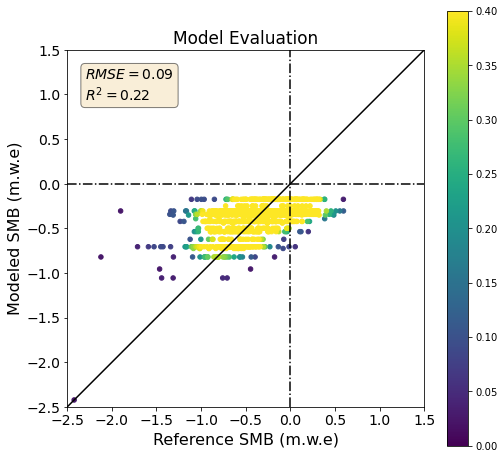

In [21]:
plot_prediction(y_train, reg_tree.predict(X_train), n_toplot=5000)

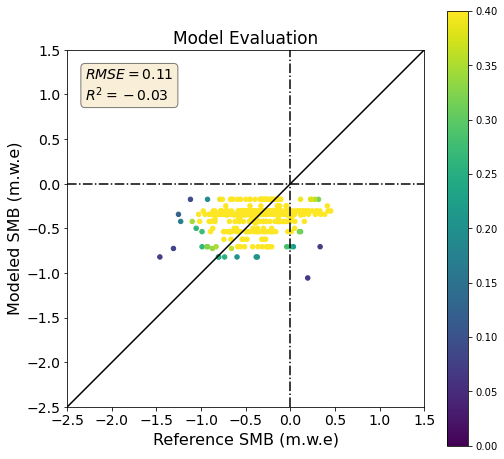

In [22]:
plot_prediction(y_validation, reg_tree.predict(X_validation), n_toplot=5000)

How well does this behave in test set?

### Ensamble of trees

We can try examples of models that combine slow learners. This models tend to work very well and be quite general. However, tunning the different hyper-parameters of the model can be tricky and something that will be explore in deeper detail in the next notebook. 

Example based on [Gradient boosting regression](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py)

In [23]:
from sklearn import ensemble
from sklearn.inspection import permutation_importance

In [24]:
#model = 'random forest'
model = 'gradient boosting'

if model == 'gradient boosting':

    params = {
        "n_estimators": 300,
        "max_depth": 4,
        "min_samples_split": 5,
        "learning_rate": 0.1,
        "loss": 'huber', #"squared_error",
        "validation_fraction": 0.2
    }
    reg_ensemble = ensemble.GradientBoostingRegressor(**params)
    
elif model == 'random forest':
    
    params = {
        "n_estimators": 300,
        "max_depth": 4,
        "min_samples_split": 5,
        "criterion": "absolute_error",
        'max_features': 10,
    }
    reg_ensemble = ensemble.RandomForestRegressor(**params)

In [25]:
%%time
reg_ensemble.fit(X_train, y_train)

/home/jovyan/shared-public/envs/Finse_MassBalance/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 4.21 s, sys: 1.97 ms, total: 4.22 s
Wall time: 4.23 s


GradientBoostingRegressor(loss='huber', max_depth=4, min_samples_split=5,
                          n_estimators=300, validation_fraction=0.2)

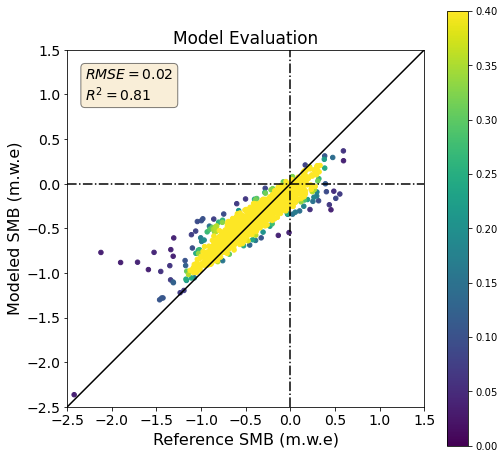

In [26]:
plot_prediction(y_train, reg_ensemble.predict(X_train), n_toplot=5000)

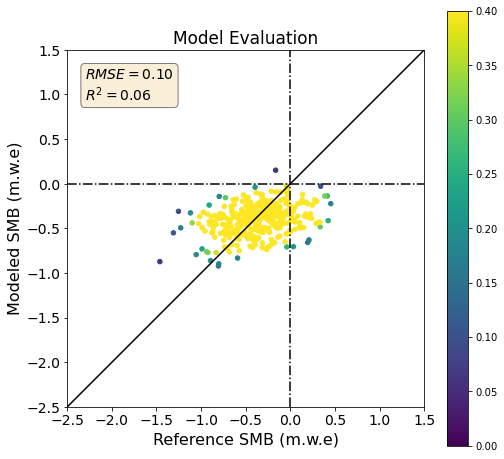

In [27]:
plot_prediction(y_validation, reg_ensemble.predict(X_validation), n_toplot=5000)

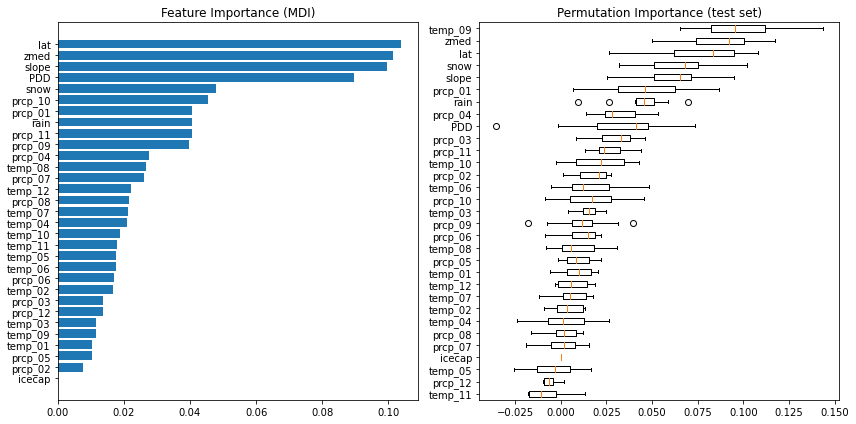

In [28]:
feature_importance = reg_ensemble.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_train_X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg_ensemble, X_validation, y_validation, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_train_X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

### Neural Network

In [29]:
from sklearn.neural_network import MLPRegressor

In [30]:
reg_nn = MLPRegressor(hidden_layer_sizes=(50,30,20,10),
                      activation='relu',
                      solver='lbfgs', 
                      batch_size=100, 
                      max_iter=200,
                      learning_rate='adaptive', 
                      shuffle=True, 
                      validation_fraction=0.1)

In [31]:
%%time
reg_nn.fit(X_train_scaled, y_train)

/home/jovyan/shared-public/envs/Finse_MassBalance/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 2.74 s, sys: 1.98 s, total: 4.72 s
Wall time: 1.24 s


/home/jovyan/shared-public/envs/Finse_MassBalance/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(batch_size=100, hidden_layer_sizes=(50, 30, 20, 10),
             learning_rate='adaptive', solver='lbfgs')

In [32]:
y_train.shape

(1395, 1)

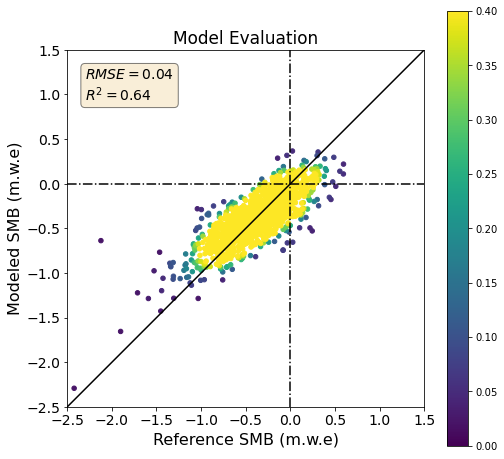

In [33]:
plot_prediction(y_train, reg_nn.predict(X_train_scaled), n_toplot=5000)

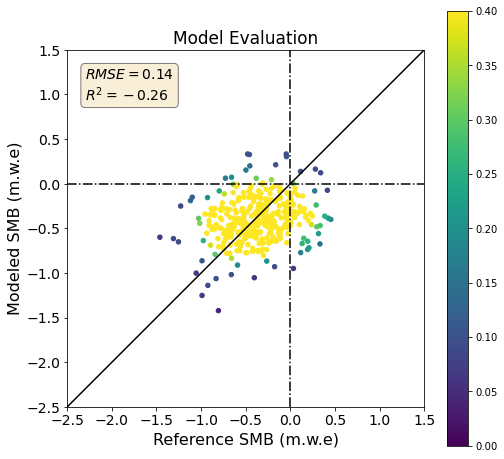

In [34]:
plot_prediction(y_validation, reg_nn.predict(X_validation_scaled), n_toplot=5000)

### [ **Exercice 3** ]
<img src="Figures/eye_logo.png" width="75"/>

Choose 2 or 3 different ML models, and play with the hyperparameters in order to improve the performance by looking at the scatter plot. 

This is just a rough way to have a best first estimate of good hyperparameters. In the next notebook we will see how to correctly look for the best possible hyperparameters by using cross-validation. 